# Visualizing Earning Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
* Using scatter plots
* How many majors are predominantly male? Predominantly female?
* Using histograms
* Which category of majors have the most students?
* Using bar plots

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.plotting import scatter_matrix
%matplotlib inline

In [19]:
recent_grads = pd.read_csv('recent-grads.csv')
display(recent_grads.head(3))
display(recent_grads.tail(3))
display(recent_grads.iloc[0])
display(recent_grads.describe())
raw_data_count = recent_grads.shape
print(raw_data_count)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


(173, 21)


In [21]:
#Drops rows with null values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape
print(cleaned_data_count)

(172, 21)


Generate scatter plots in separate jupyter notebook cells to explore the following relations:

* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

Use the plots to explore the following questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more    money?
* Is there any link between the number of full-time employees and median salary?

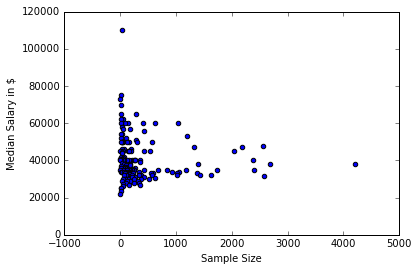

In [30]:
plt.scatter(recent_grads["Sample_size"], recent_grads["Median"])
plt.xlabel("Sample Size")
plt.ylabel("Median Salary in $")
plt.show()

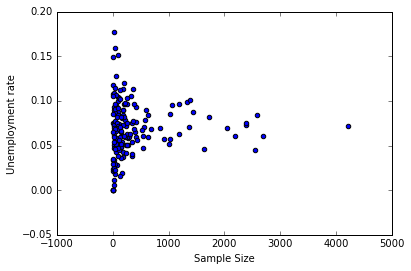

In [29]:
plt.scatter(recent_grads["Sample_size"], recent_grads["Unemployment_rate"])
plt.xlabel("Sample Size")
plt.ylabel("Unemployment rate")
plt.show()

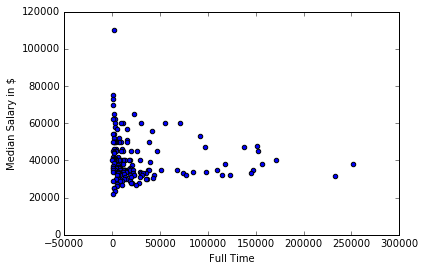

In [32]:
plt.scatter(recent_grads["Full_time"], recent_grads["Median"])
plt.xlabel("Full Time")
plt.ylabel("Median Salary in $")
plt.show()

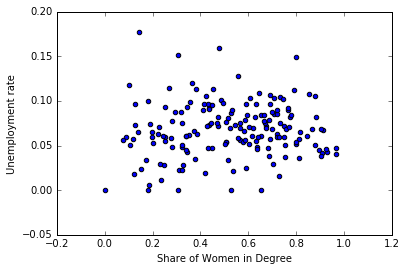

In [34]:
plt.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
plt.xlabel("Share of Women in Degree")
plt.ylabel("Unemployment rate")
plt.show()

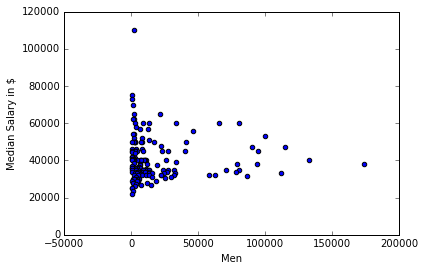

In [38]:
plt.scatter(recent_grads["Men"], recent_grads["Median"])
plt.xlabel("Men")
plt.ylabel("Median Salary in $")
plt.show()

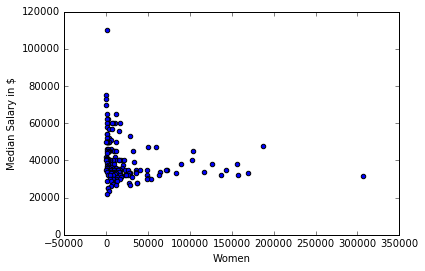

In [39]:
plt.scatter(recent_grads["Women"], recent_grads["Median"])
plt.xlabel("Women")
plt.ylabel("Median Salary in $")
plt.show()

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

* Sample_size
* Median
* Employed
* Full_time
* ShareWomen
* Unemployment_rate
* Men
* Women

We encourage you to experiment with different bin sizes and ranges when generating these histograms.

Use the plots to explore the following questions:

* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

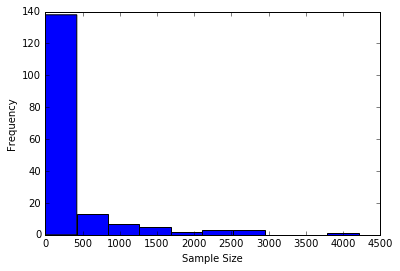

In [43]:
recent_grads['Sample_size'].plot(kind='hist')
plt.xlabel("Sample Size")
plt.show()

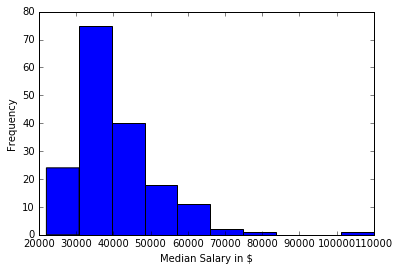

In [45]:
recent_grads['Median'].plot(kind='hist')
plt.xlabel("Median Salary in $")
plt.show()

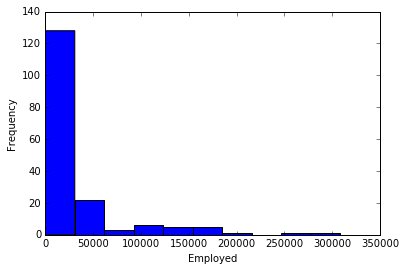

In [46]:
recent_grads['Employed'].plot(kind='hist')
plt.xlabel("Employed")
plt.show()

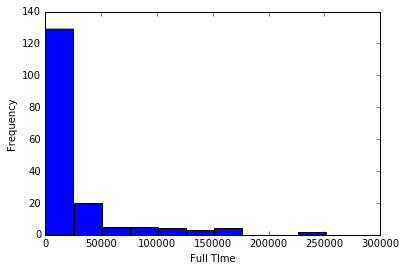

In [47]:
recent_grads['Full_time'].plot(kind='hist')
plt.xlabel("Full TIme")
plt.show()

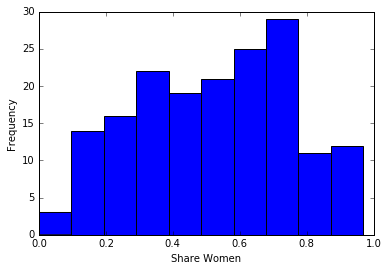

In [48]:
recent_grads['ShareWomen'].plot(kind='hist')
plt.xlabel("Share Women")
plt.show()

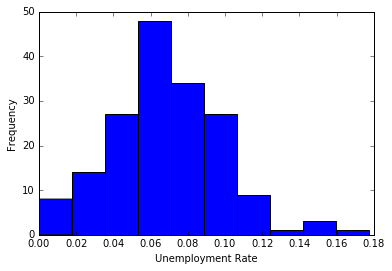

In [49]:
recent_grads['Unemployment_rate'].plot(kind='hist')
plt.xlabel("Unemployment Rate")
plt.show()

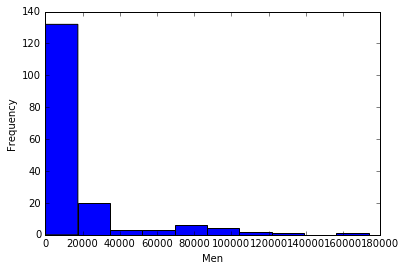

In [50]:
recent_grads['Men'].plot(kind='hist')
plt.xlabel("Men")
plt.show()

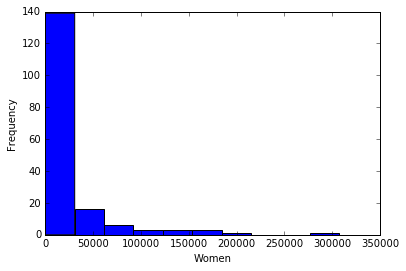

In [57]:
recent_grads['Women'].plot(kind='hist')
plt.xlabel("Women")
plt.show()

* Import scatter_matrix from the pandas.plotting module.
* Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
* Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
* Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c678c240>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c65e0eb8>,
      dtype=object)

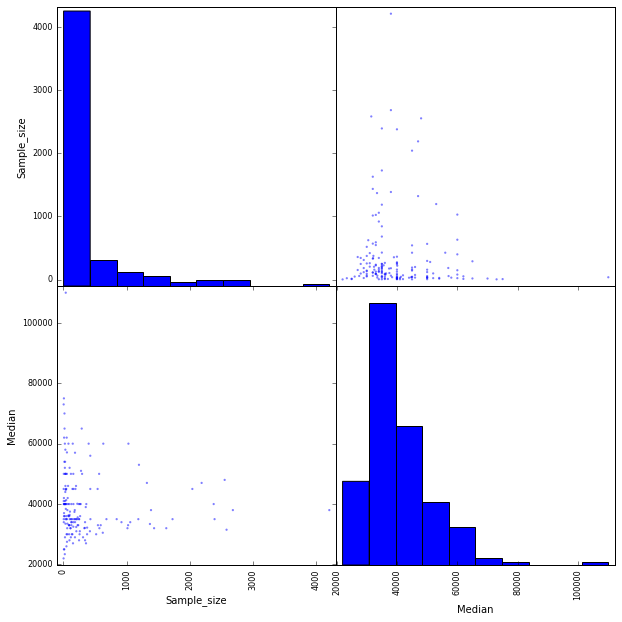

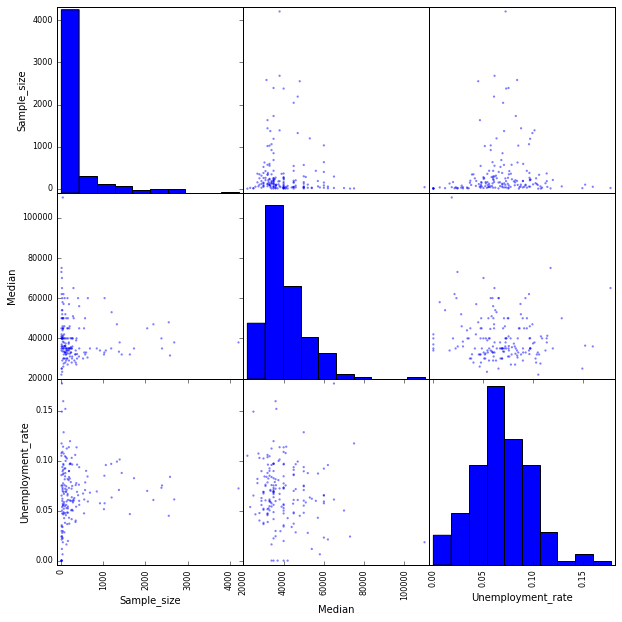

In [58]:
display(scatter_matrix(recent_grads[['Sample_size', 'Median' ]], figsize=(10, 10)))
display(scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate' ]], figsize=(10, 10)))

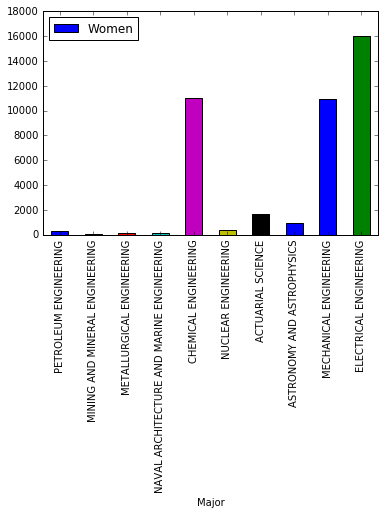

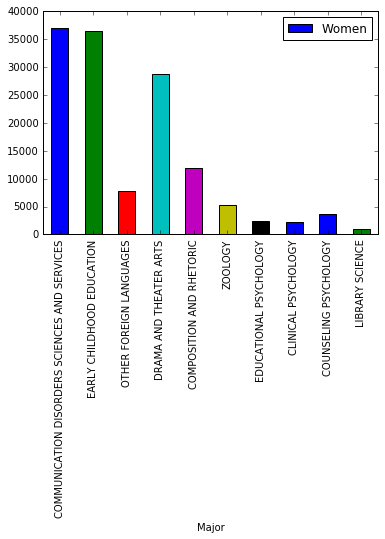

In [69]:
recent_grads.head(10).plot.bar(x='Major', y='Women')
plt.show()
recent_grads.tail(10).plot.bar(x='Major', y='Women')
plt.show()

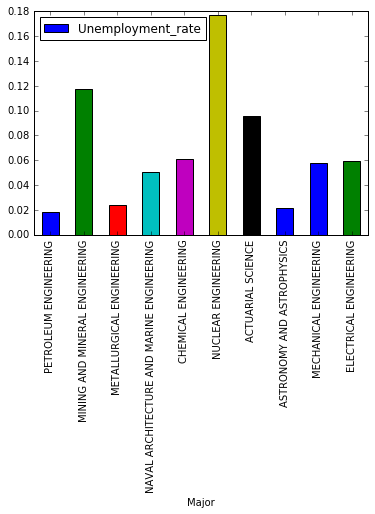

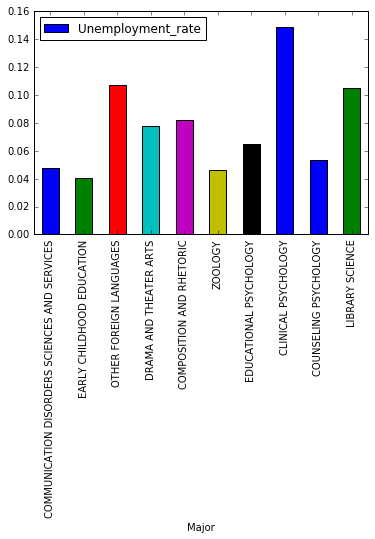

In [70]:
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate')
plt.show()
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate')
plt.show()

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.